# Vegetable Price Prediction Using Machine Learning
Implemented for Bangalore, Ramanagara market (Commodity = Brinjal) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [2]:
vegetables = pd.read_csv('Banglore_Brinjal.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Bangalore,"Binny Mill (F&V), Bangalore",Brinjal,Brinjal,FAQ,1000,2800,1600,31-Dec-19
1,2,Bangalore,"Binny Mill (F&V), Bangalore",Brinjal,Brinjal,FAQ,1200,3000,1500,30-Dec-19
2,3,Bangalore,"Binny Mill (F&V), Bangalore",Brinjal,Brinjal,FAQ,1000,3000,1500,27-Dec-19
3,4,Bangalore,"Binny Mill (F&V), Bangalore",Brinjal,Brinjal,FAQ,1200,3000,1600,26-Dec-19
4,5,Bangalore,"Binny Mill (F&V), Bangalore",Brinjal,Brinjal,FAQ,1000,3000,1500,24-Dec-19


# Data Selection

select District Name == Banglore <br>
Select Market Name == Ramanagara <br>
Then Select Commodity == Brinjal

In [3]:
vegetables = vegetables[vegetables['District Name'] == "Bangalore"]
vegetables = vegetables[vegetables['Market Name'] == "Ramanagara"]
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
788,789,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1000,1600,1300,31-Dec-19
789,790,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1400,1600,1500,30-Dec-19
790,791,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1600,2000,1800,28-Dec-19
791,792,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1600,2000,1800,27-Dec-19
792,793,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1600,2000,1800,26-Dec-19


In [4]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
797,798,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,2000,2400,2200,19
796,797,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,2000,2800,2400,20
795,796,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1600,2400,2000,21
794,795,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,2000,2400,2200,23
793,794,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,2000,2400,2200,24
792,793,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1600,2000,1800,26
791,792,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1600,2000,1800,27
790,791,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1600,2000,1800,28
789,790,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1400,1600,1500,30
788,789,Bangalore,Ramanagara,Brinjal,Brinjal,FAQ,1000,1600,1300,31


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [5]:
climate = pd.read_csv('climate_Banglore_270.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index  Sl no. District Name Market Name Commodity  Variety Grade  \
0   1083    1084     Bangalore  Ramanagara   Brinjal  Brinjal   FAQ   
1   1082    1083     Bangalore  Ramanagara   Brinjal  Brinjal   FAQ   
2   1081    1082     Bangalore  Ramanagara   Brinjal  Brinjal   FAQ   
3   1080    1081     Bangalore  Ramanagara   Brinjal  Brinjal   FAQ   
4   1079    1080     Bangalore  Ramanagara   Brinjal  Brinjal   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     1400                     1600   
1                     1200                     1600   
2                     1600                     2000   
3                     1600                     2000   
4                     1400                     1800   

   Modal Price (Rs./Quintal)  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  \
0                       1500  ...  66.575185  56.492593  99.914815  79.618148   
1                       1400  ...  66.517037  56.429630  99.914815  79.604074   

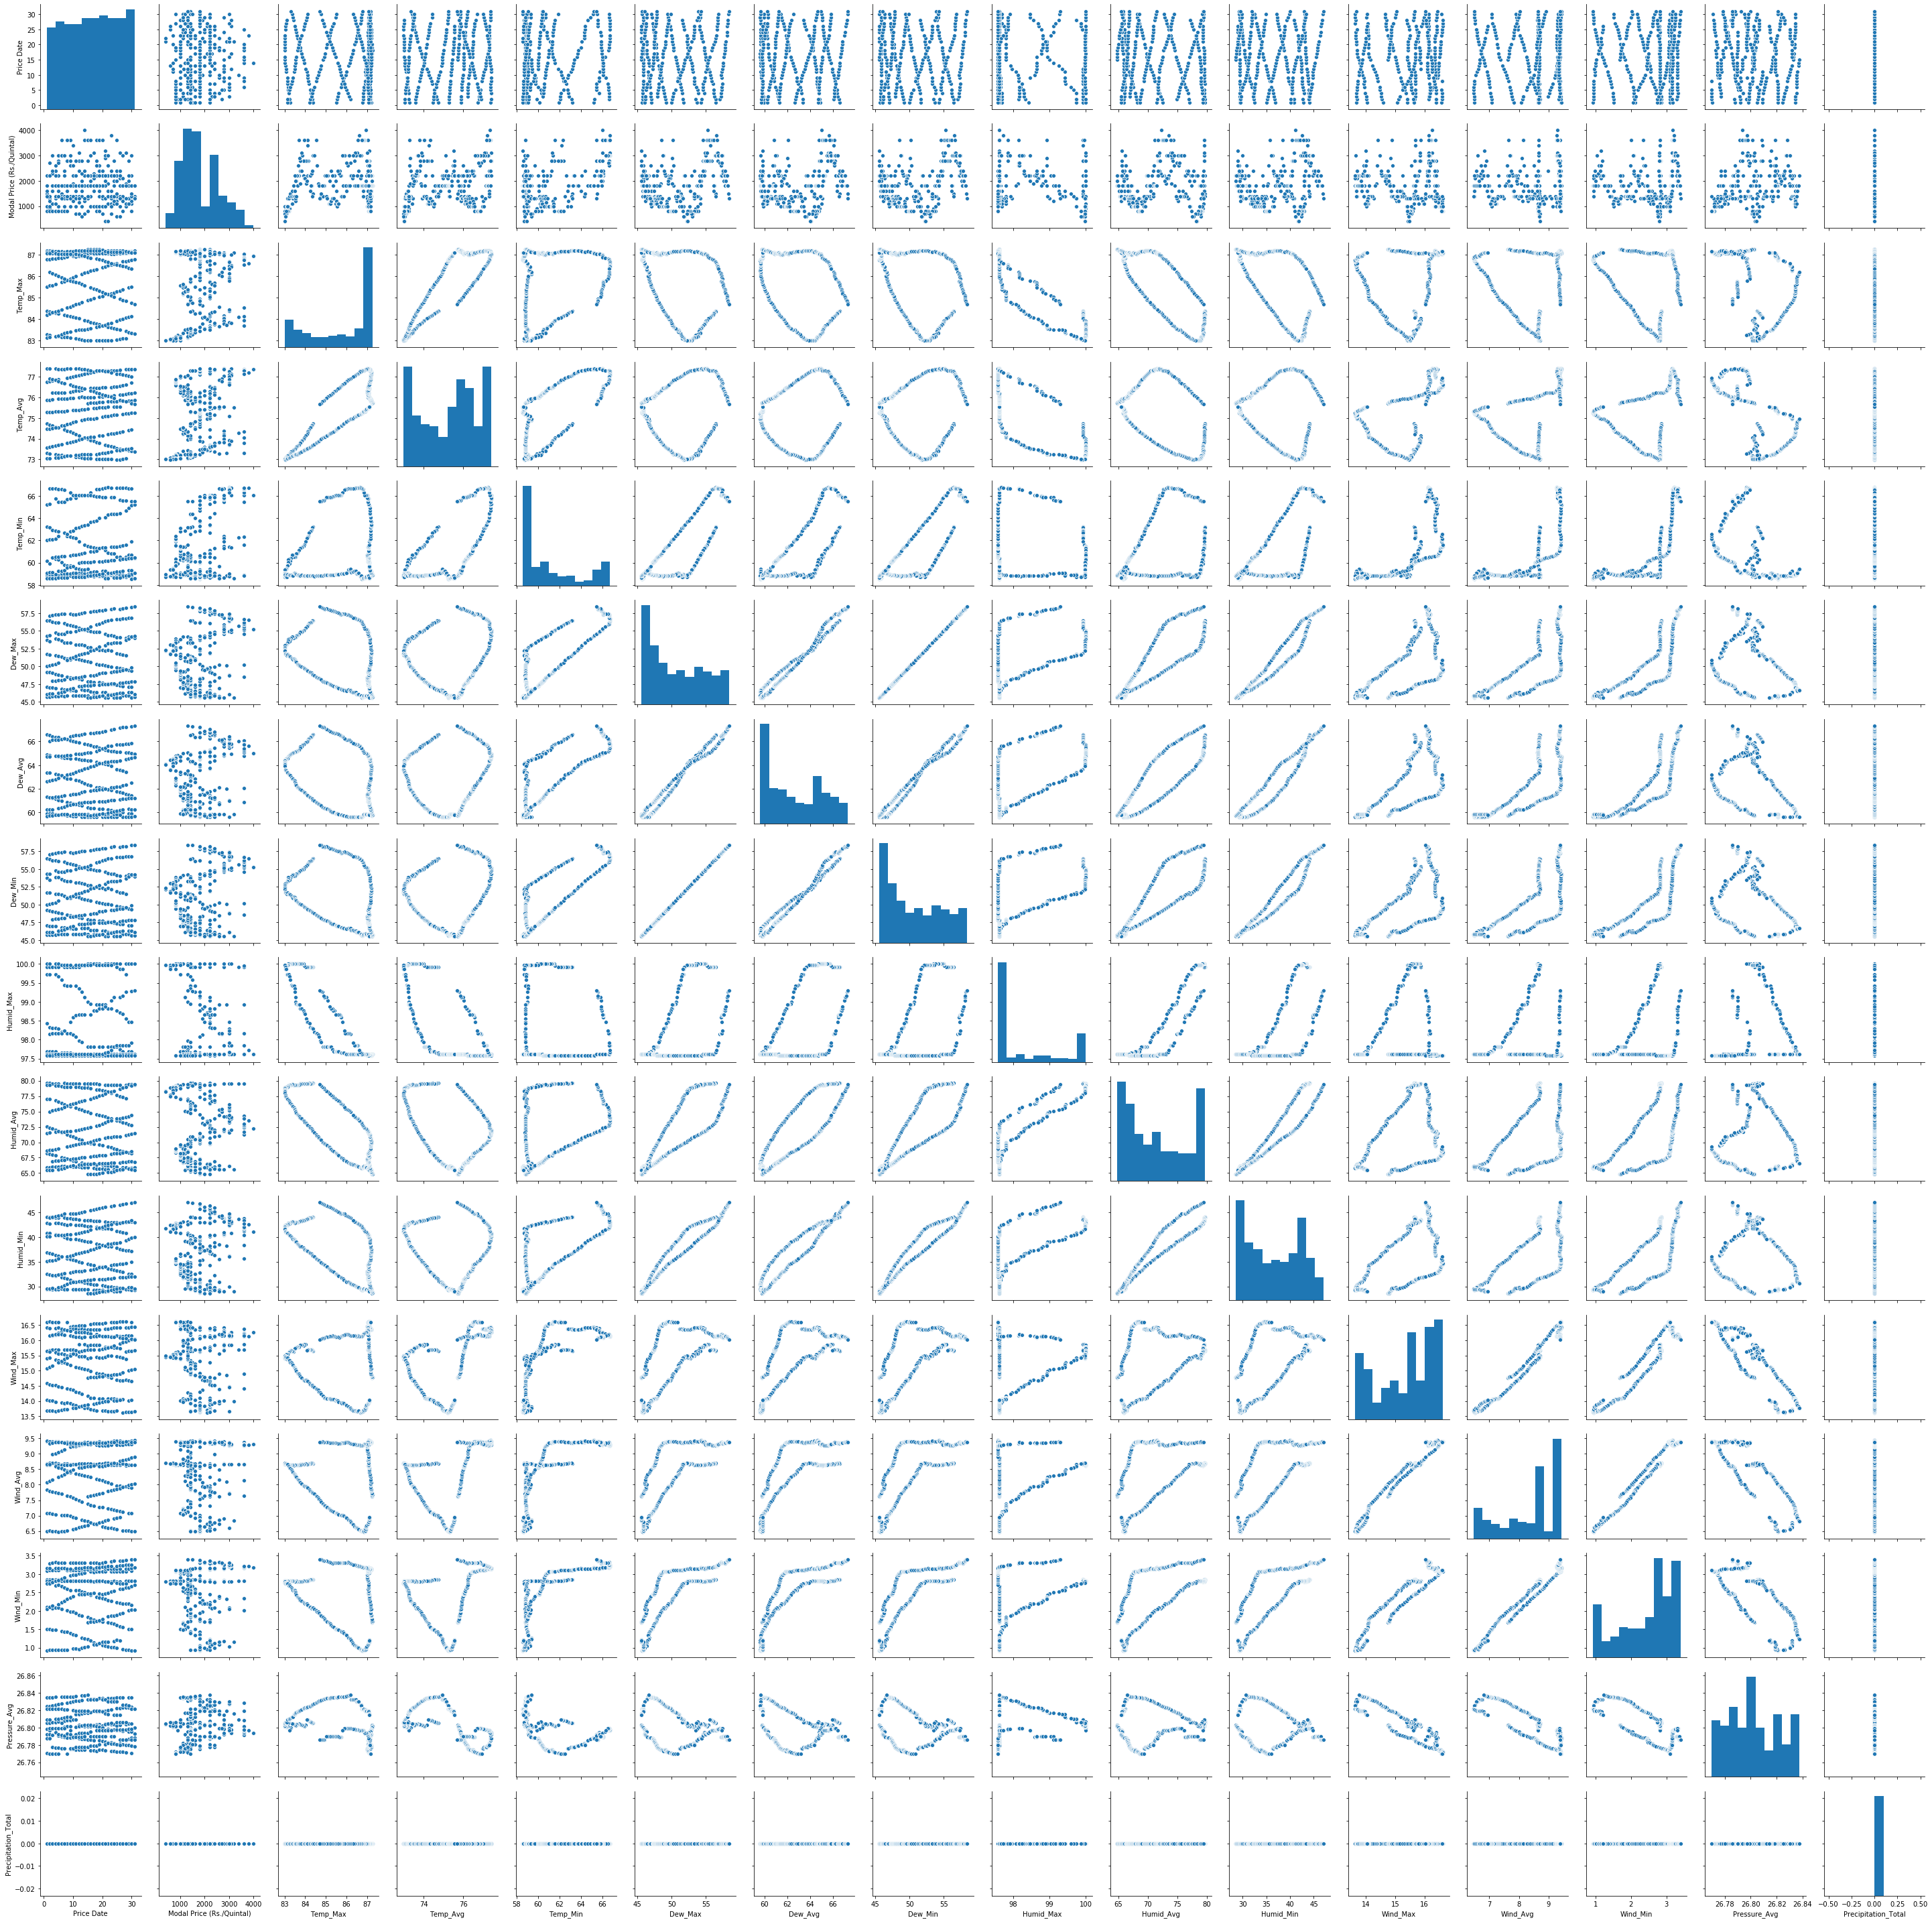

In [6]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [38]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 200,max_depth=300, random_state=42, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 2.950047731399536


In [39]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [40]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9709714289844423
0.7375706821645837


# Feature Importance

In [41]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.05650304419241595
Temp_Max -> 0.10654243557210537
Temp_Avg -> 0.04043206228155684
Temp_Min -> 0.1446230800725685
Dew_Max -> 0.09692654833579849
Dew_Avg -> 0.08419929538825993
Dew_Min -> 0.11842864776837672
Humid_Max -> 0.01280261605925289
Humid_Avg -> 0.04402141424400707
Humid_Min -> 0.03217342586162903
Wind_Max -> 0.05903052224397685
Wind_Avg -> 0.06358288340859297
Wind_Min -> 0.04855949799017104
Pressure_Avg -> 0.09217452658128827
Precipitation_Total -> 0.0


In [42]:
'''import pickle
with open("Karad_learn_max", "rb") as f:
    rf = pickle.load(f)
rf.predict()

print(np.reshape(predicted,(len(y_test),1))- np.reshape(y_test,(len(y_test),1)))
print(predicted, y_test)
'''

'import pickle\nwith open("Karad_learn_max", "rb") as f:\n    rf = pickle.load(f)\nrf.predict()\n\nprint(np.reshape(predicted,(len(y_test),1))- np.reshape(y_test,(len(y_test),1)))\nprint(predicted, y_test)\n'

In [43]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

2820.0->2600
1827.5->1800
2495.0->2600
2926.5->3000
3479.0->3600
3159.0->2800
767.0->800
2398.5->2200
2364.5->2300
1482.5->1400
2825.0->2600
1133.0->1000
1469.0->1400
911.0->800
3416.0->3000
537.0->700
642.0->400
1771.5->1400
1803.0->1800
1689.0->1400
2168.5->2300
1371.5->1400
2010.5->2200
1318.5->1300
1855.5->1800
2529.0->2200
1646.0->1400
2764.5->2800
1612.5->2200
1280.5->1300
1369.0->1300
1007.5->800
924.5->800
926.0->1300
1209.5->1300
2050.0->2100
1580.0->1800
2339.0->1800
2211.5->2200
1228.0->1150
1058.5->1300
1625.5->1800
1637.5->1800
1751.0->1600
1466.5->1400
1435.0->1000
1788.0->1100
2219.5->2200
3064.5->2800
1442.5->2600
1437.0->1300
1857.0->2000
904.5->1000
1872.0->2200
2083.0->1800
1810.5->1300
1526.0->1400
2254.0->2600
2183.0->2100
1215.5->1200
1377.5->1300
2493.0->2200
938.5->800
874.5->800
1454.5->1400
1904.5->2200
2332.5->2200
2322.5->2000
1780.0->2600
1634.5->2200
1913.5->2200
2085.5->2000
2276.0->2200
1414.5->1800
2503.0->2300
2193.0->1800
2080.0->2100
2932.0->2800
320

In [44]:
print(sum_a/l)

232.08988764044943
